# UFO Tourism

### Motivation:

Help people plan where to go to see UFO sighting and what to expect. 


#### First Question: 
How does Nevada (Area 51) and New Mexico (Roswell) differ in sighting duration time? - (bootstrap & ttest) 

#### Second Question: 
How different are the durations between shapes? - (boot strap + ttest) (done)

#### Third Question: 
Where should you go to see the most sightings? (Chi square test) (today)

#### Fourth Question: 
Do all the shapes last the same amout of time? (ANOVA) 

---

#### 1. First, import the following libraries

In [120]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
# !pip install cufflinks
import cufflinks as cf
cf.go_offline()
from plotly.offline import iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#### 2. Connect to the database called ufo.db which was made from a csv file which was made from scraping the site:  http://www.nuforc.org/index.html

In [2]:
conn = sqlite3.connect('ufos.db')

In [3]:
c = conn.cursor()

#### 3. Grab all the data from the database ufo and save it as a dataframe table. 

In [4]:
c.execute('''select * from populations''')
population_df = pd.DataFrame(c.fetchall())
population_df.columns = [i[0] for i in c.description]

In [5]:
population_df.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
1,AK,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
2,AZ,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
3,AR,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
4,CA,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"


In [6]:
column_names = population_df.columns

for column_name in column_names:
    population_df[column_name]=population_df[column_name].apply(lambda x: x.replace(',',''))
population_df.head()


,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [7]:
for column_name in column_names[1:]:
    population_df[column_name] = population_df[column_name].astype(int)
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
Geographic Area    51 non-null object
2010               51 non-null int64
2011               51 non-null int64
2012               51 non-null int64
2013               51 non-null int64
2014               51 non-null int64
2015               51 non-null int64
2016               51 non-null int64
2017               51 non-null int64
2018               51 non-null int64
dtypes: int64(9), object(1)
memory usage: 4.1+ KB


In [8]:
c.execute('''select * from ufos''')
ufo_df = pd.DataFrame(c.fetchall())
ufo_df.columns = [i[0] for i in c.description]
ufo_df.head()

,Date_Time,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,5/9/19 21:15,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,5/8/19 23:00,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,5/8/19 23:00,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,5/8/19 01:30,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,5/8/19 01:00,Highlands,NC,Light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


In [9]:
ufo_df.head()

,Date_Time,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,5/9/19 21:15,Cincinnati,OH,Triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,5/8/19 23:00,Statesboro,GA,Triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,5/8/19 23:00,Norfolk,VA,Light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,5/8/19 01:30,Saint George,UT,Other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,5/8/19 01:00,Highlands,NC,Light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


#### 4. Display the data from the database as a dataframe.

In [10]:
ufo_df.Duration_sec=ufo_df.Duration_sec.astype(float)

#### 5. Data Exploration and Cleaning.

In [23]:
c.execute('''select * from ufos where state = 'NM' ''')
ufo_df_nm = pd.DataFrame(c.fetchall())
ufo_df_nm.columns = [i[0] for i in c.description]

In [26]:
c.execute('''select * from ufos where state= 'NV' ''')
ufo_df_nv = pd.DataFrame(c.fetchall())
ufo_df_nv.columns = [i[0] for i in c.description]

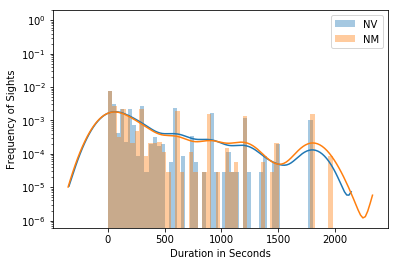

In [27]:
ufo_df_nv.Duration_sec=ufo_df_nv.Duration_sec.astype(float)
ufo_df_nm.Duration_sec=ufo_df_nm.Duration_sec.astype(float)
fig = plt.figure(figsize=(6,4))
sns.distplot(ufo_df_nv[ufo_df_nv.Duration_sec<2000]['Duration_sec'], bins=50, label='NV')
sns.distplot(ufo_df_nm[ufo_df_nm.Duration_sec<2000]['Duration_sec'], bins=50, label='NM')
plt.semilogy(True)
plt.ylabel('Frequency of Sights')
plt.xlabel('Duration in Seconds')
plt.legend()

In [30]:
# ufo_df.Shape.value_counts()

#### Doing a bootstrap sampling on the duration for Nevada and New Mexico. 

In [31]:
nv_means = []
for i in range(1000):
    x_nv = np.random.choice(ufo_df_nv['Duration_sec'],size=500)
    nv_means.append(x_nv.mean())

In [32]:
nm_means = []
for i in range(1000):
    x_nm = np.random.choice(ufo_df_nm['Duration_sec'],size=500)
    nm_means.append(x_nm.mean())

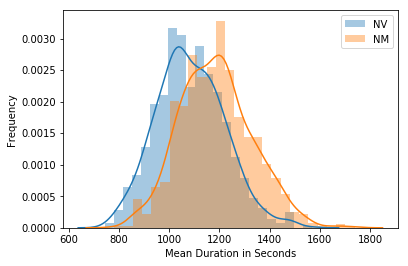

In [33]:
fig = plt.figure(figsize=(6,4))
sns.distplot(nv_means, label='NV')
sns.distplot(nm_means, label='NM')
plt.ylabel('Frequency')
plt.xlabel('Mean Duration in Seconds')
plt.legend()

In [34]:
ttest_ind(nv_means,
          nm_means ,
          equal_var=False)

Ttest_indResult(statistic=-16.240722291796846, pvalue=8.552190900044809e-56)

#### If you want to see a sighting for longer, go to New Mexico. 

### What shape to expect to see. 

In [36]:
ufo_df.Shape.value_counts().head(3)

Light       18609
Circle       9353
Triangle     8687
Name: Shape, dtype: int64

In [39]:
circle_means = []
for i in range(1000):
    x_circle = np.random.choice(ufo_df[ufo_df.Shape=='Circle']['Duration_sec'],size=500)
    circle_means.append(x_circle.mean())

In [40]:
triangle_means = []
for i in range(1000):
    x_triangle = np.random.choice(ufo_df[ufo_df.Shape=='Triangle']['Duration_sec'],size=500)
    triangle_means.append(x_triangle.mean())
    

In [41]:
light_means = []
for i in range(1000):
    x_light = np.random.choice(ufo_df[ufo_df.Shape=='Light']['Duration_sec'],size=500)
    light_means.append(x_light.mean())
    

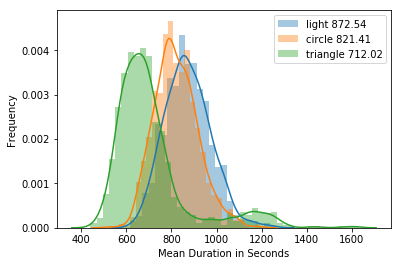

In [51]:
fig = plt.figure(figsize=(6,4))
clabel = 'circle {0:1.2f}'.format(np.array(circle_means).mean())
tlabel = 'triangle {0:1.2f}'.format(np.array(triangle_means).mean())
llabel = 'light {0:1.2f}'.format(np.array(light_means).mean())
sns.distplot(light_means, label=llabel)
sns.distplot(circle_means, label=clabel)
sns.distplot(triangle_means, label=tlabel)
plt.ylabel('Frequency')
plt.xlabel('Mean Duration in Seconds')
plt.legend()
# plt.savefig('shape.png')

In [52]:
ttest_ind(circle_means,
          triangle_means,
          equal_var=False)

Ttest_indResult(statistic=17.463466197074766, pvalue=1.7443471068657133e-62)

In [53]:
ttest_ind(circle_means,
          light_means,
          equal_var=False)

Ttest_indResult(statistic=-11.622695071345559, pvalue=2.9275127445664277e-30)

In [54]:
ttest_ind(triangle_means,
          light_means,
          equal_var=False)

Ttest_indResult(statistic=-25.24308285446043, pvalue=1.0082336489739122e-118)

#### The null hypothesis was that people see them the same amount of time. If you see a light in the sky it will last on average "2 minutes" longer than a circle. 

## Joining with population_df etc. 

#### Grouped number of sights by year and by states.

In [56]:
year_list = range(2010, 2019)
cmd = """SELECT state """
for year in year_list:
    cmd += """, \n sum(CAST ("y{0}" AS int)) as N{0}""".format(year)
cmd += """\n FROM \n \t(SELECT state """
for year in year_list:
    cmd += """, \n \t COUNT( CASE WHEN strftime('%Y', event_date) = '{0}' THEN shape END) AS 'y{0}'""".format(year)
cmd += """, \n \t strftime('%Y', event_date) as year FROM ufos """
cmd += """\n \t GROUP BY strftime('%Y',event_date), state)"""
cmd += """\n GROUP BY state"""
# print(cmd)

In [57]:
c.execute(cmd)
ufo_df_groupstate = pd.DataFrame(c.fetchall())
ufo_df_groupstate.columns = [i[0] for i in c.description]
ufo_df_groupstate.head() #[(ufo_df_groupstate.state=='AB')]

,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,AB,19,11,17,20,38,33,25,38,13
1,AK,11,14,40,47,39,32,36,20,20
2,AL,20,29,50,70,111,58,44,55,24
3,AR,37,35,46,50,25,37,31,36,32
4,AZ,94,127,168,211,265,247,213,190,74


#### Merged the population and ufos dataframes on state. 

In [58]:
ufo_pop_df  = pd.merge(population_df, ufo_df_groupstate,
                  left_on='Geographic Area',
                  right_on='state', 
                  how='left')

In [60]:
ufo_pop_df.drop(['Geographic Area'], axis=1, inplace=True)
ufo_pop_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,AL,20,29,50,70,111,58,44,55,24
1,713906,722038,730399,737045,736307,737547,741504,739786,737438,AK,11,14,40,47,39,32,36,20,20
2,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,AZ,94,127,168,211,265,247,213,190,74
3,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,AR,37,35,46,50,25,37,31,36,32
4,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,CA,481,498,640,653,780,725,516,516,270


#### Creating new columns with the number of sites per million people. 

In [61]:
for year in year_list:
    new_col = 'NperMil{0}'.format(year)
    ufo_col = 'N{0}'.format(year)
    pop_col = '{0}'.format(year)
    
    ufo_pop_df[new_col] = ufo_pop_df[ufo_col]/(ufo_pop_df[pop_col]/1e6)

In [63]:
ufo_pop_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,state,...,N2018,NperMil2010,NperMil2011,NperMil2012,NperMil2013,NperMil2014,NperMil2015,NperMil2016,NperMil2017,NperMil2018
0,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,AL,...,24,4.179337,6.043135,10.383000,14.491373,22.922134,11.950976,9.044667,11.281774,4.910113
1,713906,722038,730399,737045,736307,737547,741504,739786,737438,AK,...,20,15.408191,19.389561,54.764588,63.768155,52.967037,43.387066,48.549974,27.034845,27.120924
2,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,AZ,...,74,14.669681,19.618454,25.622923,31.801060,39.353474,36.144952,30.667551,26.954652,10.318412
3,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,AR,...,32,12.662655,11.903114,15.582080,16.894466,8.423958,12.422748,10.366471,11.988024,10.617737
4,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,CA,...,270,12.888220,13.229965,16.859505,17.058149,20.194102,18.612106,13.160201,13.096663,6.825586


In [71]:
expected_ufo_rate = []
for year in year_list:
    pop_col='N{}'.format(year)
    total_ufos = ufo_pop_df[pop_col].sum()
    ufo_col='{}'.format(year)
    total_pop = ufo_pop_df[ufo_col].sum()
    expected_ufo_rate.append(total_ufos/(total_pop/1e6))
expected_ufo_rate #expected rates per year


[10.613395245990976,
 13.107387772108318,
 19.663927924146993,
 20.25579333486759,
 22.877860108236213,
 17.75566670544022,
 14.507631568262095,
 12.73577323171193,
 7.720817347609237]

In [81]:
# observed values sightings for the year 2010 for all the states
best_sightings = pd.DataFrame(ufo_pop_df['state'])
for i, year in enumerate(year_list):
    pop_col='NperMil{}'.format(year)
    new_col='chi2_{}'.format(year)
    best_sightings[new_col]=(ufo_pop_df[pop_col]-expected_ufo_rate[i])**2/expected_ufo_rate[i]
    


In [85]:
best_sightings = best_sightings.set_index('state').T

In [76]:
# 1. cut the table and transpose chi-squared
# 2. Map probabilities
# 3. Plot table 


In [92]:
best_sightings.iplot()

## ANOVA

In [119]:
formula = 'Duration_sec ~ C(Shape)'
lm = ols(formula, ufo_df).fit()
table = sm.stats.anova_lm(lm, typ=1)
print(table)

               df        sum_sq       mean_sq          F        PR(>F)
C(Shape)     42.0  4.453341e+09  1.060319e+08  10.746247  8.405330e-70
Residual  87706.0  8.653845e+11  9.866880e+06        NaN           NaN


#### Not all shapes have the same duration. Which one lasts longer?

In [125]:
mc = MultiComparison(ufo_df['Duration_sec'], ufo_df['Shape'])
result = mc.tukeyhsd()
 
# type(result)
# print(mc.groupstrue)